## OCR ESERCITAZIONE

Costruire un modello ibrido per il riconoscimento di caratteri (OCR).
1. Il modello deve comprendere almeno un layer convoluzionale in input e successivamente un layer ricorrente
2. Utilizza un layer Reshape tra la parte convoluzionale e lo strato ricorrente

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils
import pandas as pd

In [2]:
import pandas as pd
train_df = pd.read_csv('./emnist_train.csv')

In [3]:
train_df.head()

,char,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,r,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,n,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
W, H=28,28
X = train_df.iloc[:,2:]

In [5]:
import numpy as np

def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image



In [6]:
sample_image = train_df.iloc[1,2:]
sample_label = train_df.iloc[1]['char']
sample_image.shape,sample_label

((784,), 'a')

In [7]:
X = np.apply_along_axis(reshape_and_rotate, 1, X.values.astype('float32'))
X = X / 255

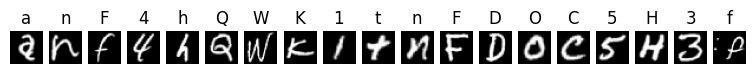

In [9]:
plt.figure(figsize=(10,10))
for i in range(1,20):
    plt.subplot(1,20,i)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(train_df.iloc[i]['char'])
    plt.axis('off')

In [10]:
X = X.reshape(-1, W, H, 1)


In [ ]:
y = train_df.iloc[:,1].values
number_of_classes = len(set(y))
y = np_utils.to_categorical(y, number_of_classes)


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.1, random_state=1)

In [106]:
import keras.backend as K
from keras.backend import clear_session
clear_session()
model = Sequential() 
model.add(layers.Conv2D(16, (3,3), activation = 'relu', padding='same',input_shape=(W, H, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(32, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Reshape(target_shape=((1, 1568)), name='reshape'))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout = 0.2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 32)         128       
 ormalization)                                                   
                                                        

In [108]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

In [109]:
history = model.fit(X_train,
                    y_train, 
                    epochs=30, 
                    batch_size=64, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/30
1428/1428 [==============================] - 69s 45ms/step - loss: 0.6766 - accuracy: 0.7848 - val_loss: 0.4425 - val_accuracy: 0.8467
Epoch 2/30
1428/1428 [==============================] - 70s 49ms/step - loss: 0.3997 - accuracy: 0.8566 - val_loss: 0.3857 - val_accuracy: 0.8658
Epoch 3/30
1428/1428 [==============================] - 74s 52ms/step - loss: 0.3479 - accuracy: 0.8712 - val_loss: 0.3922 - val_accuracy: 0.8630
Epoch 4/30
1428/1428 [==============================] - 70s 49ms/step - loss: 0.3181 - accuracy: 0.8802 - val_loss: 0.3756 - val_accuracy: 0.8691
Epoch 5/30
1428/1428 [==============================] - 66s 47ms/step - loss: 0.2962 - accuracy: 0.8887 - val_loss: 0.3821 - val_accuracy: 0.8692
Epoch 6/30
1428/1428 [==============================] - 69s 48ms/step - loss: 0.2752 - accuracy: 0.8946 - val_loss: 0.3910 - val_accuracy: 0.8720
Epoch 7/30
1428/1428 [==============================] - 68s 48ms/step - loss: 0.2617 - accuracy: 0.8985 - val_loss: 0.3636 -

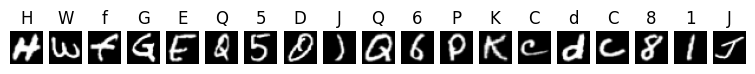

In [119]:
plt.figure(figsize=(10,10))
for i in range(1,20):
    plt.subplot(1,20,i)
    plt.imshow(X_val[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dict[y_pred[i].argmax()])
    plt.axis('off')

In [125]:
test_df = pd.read_csv('./emnist_test.csv')
X_test = test_df.iloc[:,2:]
X_test = np.apply_along_axis(reshape_and_rotate, 1, X_test.values.astype('float32'))
X_test = X_test / 255
X_test = X_test.reshape(-1, W, H, 1)

In [130]:
y_test = test_df.iloc[:,1].values
number_of_classes = len(set(y_test))
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [131]:
model.evaluate(X_test,y_test)

588/588 [==============================] - 7s 11ms/step - loss: 0.3987 - accuracy: 0.8768


[0.39866968989372253, 0.8767552971839905]

588/588 [==============================] - 6s 11ms/step


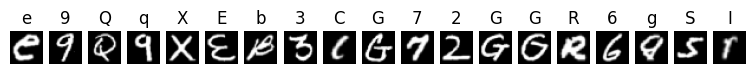

In [134]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,10))
for i in range(1,20):
    plt.subplot(1,20,i)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dict[y_pred[i].argmax()])
    plt.axis('off')